In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
books = pd.read_csv("/content/BooksDataSet.csv")
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
# removing the unnamed : 0

books = books[['book_id', 'book_name', 'genre', 'summary']]
books.head(3)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...


In [ ]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


<ipython-input-8-94a450449bd5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x = books['genre'],palette='plasma')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

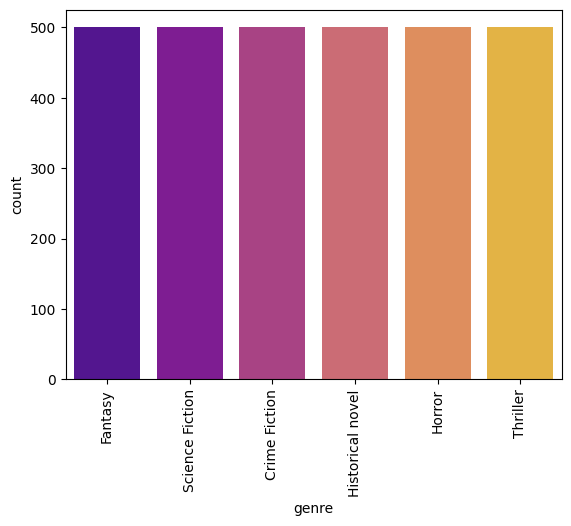

In [ ]:
sn.countplot(x = books['genre'],palette='plasma')
plt.xticks(rotation = 'vertical')

In [ ]:
books['summary'].iloc[1]


' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

In [ ]:
## cleaning the text

def cleantext(text):

    # removing the "\"

    text = re.sub("'\''","",text)

    # removing special symbols

    text = re.sub("[^a-zA-Z]"," ",text)

    # removing the whitespaces

    text = ' '.join(text.split())

    # convert text to lowercase

    text = text.lower()

    return text



books['summary'] = books['summary'].apply(lambda x:cleantext(x))
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

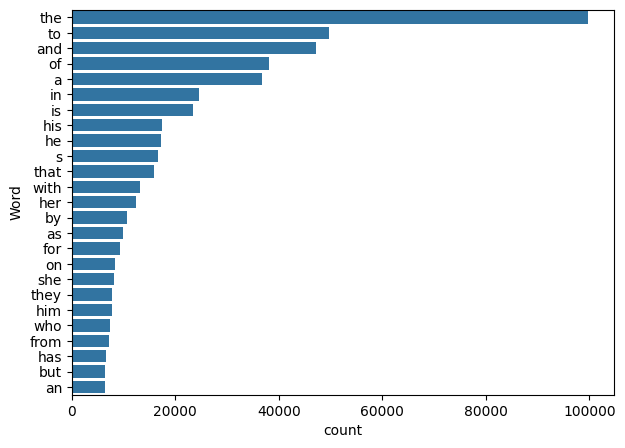

In [ ]:
def showmostfrequentwords(text,no_of_words):

    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)

    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})

    df = wordsdf.nlargest(columns="count",n = no_of_words)

    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()

    return wordsdf


# 25 most frequent words

wordsdf = showmostfrequentwords(books['summary'],25)

In [ ]:
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')


,word,count
3,the,99808
17,to,49665
14,and,47183
46,of,38003
23,a,36749
80,in,24496
2,is,23358
49,his,17464
51,he,17210
12,s,16710


# Removing the stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# removing the stopwords

def removestopwords(text):

    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

books['summary'] = books['summary'].apply(lambda x:removestopwords(x))
books['summary'].iloc[1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piper leo told demigods taken back camp half blood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon dis

# Lemmatizing

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['summary'] = books['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Stemming

In [ ]:
# Approach

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):

    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "

    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

books['summary'] = books['summary'].apply(lambda text:stemming(text))
books['summary'].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

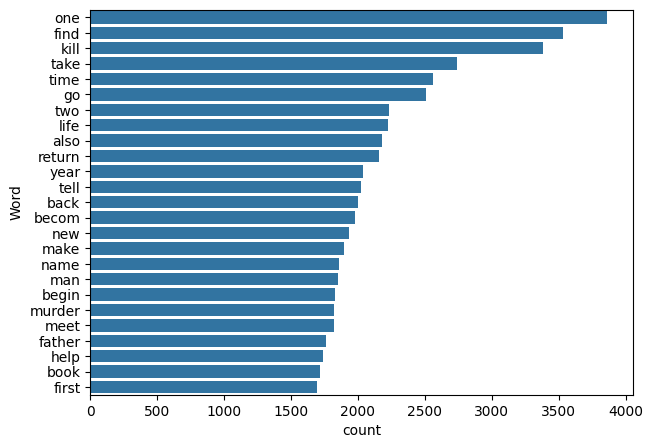

In [ ]:
# visualising frewords

freq_df = showmostfrequentwords(books['summary'],25)

In [ ]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')


,word,count
242,one,3858
230,find,3533
240,kill,3380
153,take,2743
1143,time,2563
88,go,2509
38,two,2235
418,life,2224
415,also,2179
407,return,2158


# Encoding


In [ ]:
books_list = list(books['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list,encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [ ]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5])

# Model Building


In [ ]:
## count vectorizer

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(books['summary'])
bagofword_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 245360 stored elements in Compressed Sparse Row format>

In [ ]:
test = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,
                                                    test_size=0.2)
X_train.shape,X_test.shape

((2400, 1000), (600, 1000))

In [ ]:
X_train

<2400x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 196894 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

,genre
417,0
878,1
2505,5
643,1
2614,5
...,...
2763,5
1617,3
775,1
2808,5


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Convert sparse matrices to dense
    dense_transformer = FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x)

    if isinstance(model, Sequential):
        # Neural network-specific preprocessing
        num_classes = len(np.unique(y_train))
        y_train_cat = to_categorical(y_train, num_classes=num_classes)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)

        # Reshape data for sequential models
        x_train_seq = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
        x_test_seq = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

        # Compile and fit the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(x_train_seq, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

        # Evaluate the model
        y_pred_probs = model.predict(x_test_seq)
        y_pred = np.argmax(y_pred_probs, axis=1)

    else:
        # Traditional ML model pipeline
        pipe = Pipeline([
            ('to_dense', dense_transformer),
            ('model', model),
        ])
        pipe.fit(x_train, y_train)
        y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
    # 'LSTM Neural Network': Sequential([
    #     LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    #     Dropout(0.2),
    #     Dense(len(np.unique(y_train)), activation='softmax'),
    # ]),
    # 'GRU Neural Network': Sequential([
    #     GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    #     Dropout(0.2),
    #     Dense(len(np.unique(y_train)), activation='softmax'),
    # ]),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

# Find the best model based on accuracy
max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")


100%|██████████| 15/15 [01:57<00:00,  7.82s/it]

+---------------------------------+------------+-------------+----------+------------+-----------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix      |
+=================================+============+=============+==========+============+=======================+
| Logistic Regression             |   0.583333 |    0.57902  | 0.582533 |   0.57915  | [[66 15  8 14 13  4]  |
|                                 |            |             |          |            |  [13 66  4  9  7  8]  |
|                                 |            |             |          |            |  [ 0  5 54  3 14 21]  |
|                                 |            |             |          |            |  [ 7  6  2 73  5 10]  |
|                                 |            |             |          |            |  [ 8  9  7  1 50  6]  |
|                                 |            |             |          |            |  [ 6  8 21  9  7 41]] |
+

Best Model: HistGradientBoosting Classifier
Accuracy: 0.6350
Precision: 0.6343
Recall: 0.6366
F1 Score: 0.6343


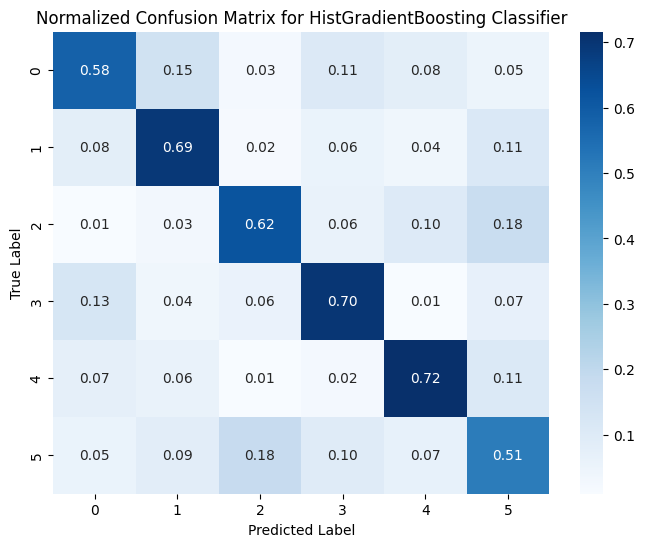

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, class_names, title="Confusion Matrix", normalize=False):
    """
    Function to plot confusion matrix using seaborn.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# After identifying the best model
best_model = models[best_model_name]

# Retrain the best model on the entire training set and evaluate on the test set
accuracy, precision, recall, f1, cm = evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Print evaluation metrics
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot normalized confusion matrix
class_names = [str(i) for i in np.unique(y_test)]
plot_confusion_matrix(cm, class_names, title=f"Normalized Confusion Matrix for {best_model_name}", normalize=True)

# Visualizing additional metrics as bar plots
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}




In [40]:
X_train

<2400x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 196894 stored elements in Compressed Sparse Row format>

In [41]:
# Ensure X_train and X_test are converted to dense format
if hasattr(X_train, "toarray"):
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()
else:
    X_train_dense = X_train
    X_test_dense = X_test

# Train the model
model = HistGradientBoostingClassifier()
model.fit(X_train_dense, y_train)  # Training the model

# Calculate metrics on the training set
train_predictions = model.predict(X_train_dense)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='macro')
train_recall = recall_score(y_train, train_predictions, average='macro')
train_f1 = f1_score(y_train, train_predictions, average='macro')

# Calculate metrics on the test set
test_predictions = model.predict(X_test_dense)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='macro')
test_recall = recall_score(y_test, test_predictions, average='macro')
test_f1 = f1_score(y_test, test_predictions, average='macro')

# Create a DataFrame for metrics
import pandas as pd

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})

print(metrics_df)


      Metric  Train Set  Test Set
0   Accuracy   0.998750  0.635000
1  Precision   0.998725  0.634315
2     Recall   0.998758  0.636571
3   F1 Score   0.998741  0.634252


In [43]:
from joblib import dump, load

# Save the model to a file
dump(model, "book_genre_classification.joblib")
print("Model saved successfully.")


Model saved successfully.
